In [101]:
"""
Genetic Algorithm
"""
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import math

def aimFunction(x):
    y=x+5*math.sin(5*x)+2*math.cos(3*x)
    return y

x=[i/100 for i in range(900)]
y=[0 for i in range(900)]
for i in range(900):
    y[i]=aimFunction(x[i])

In [102]:
population=[]
for i  in range(10):
    entity=''
    for j in range(17):  
        entity=entity+str(np.random.randint(0,2))
    population.append(entity)

In [103]:
"""
utils.py
"""
from __future__ import division

def decode(x):
    y=0+int(x,2)/(2**17-1)*9
    return y



def fitness(population,aimFunction):
    value=[]
    for i in range(len(population)):
        value.append(aimFunction(decode(population[i])))
        #weed out negative value
        if value[i]<0:
            value[i]=0
    return value

In [104]:
"""
selection.py
"""
from __future__ import division
import numpy as np
def selection(population,value):

    #轮盘赌选择
    fitness_sum=[]
    for i in range(len(value)):
        if i ==0:
            fitness_sum.append(value[i])
        else:
            fitness_sum.append(fitness_sum[i-1]+value[i])

    for i in range(len(fitness_sum)):
        fitness_sum[i]/=sum(value)

    #select new population
    population_new=[]
    for i in range(len(value)):
        rand=np.random.uniform(0,1)
        for j in range(len(value)):
            if j==0:
                if 0<rand and rand<=fitness_sum[j]:
                    population_new.append(population[j])

            else:
                if fitness_sum[j-1]<rand and rand<=fitness_sum[j]:
                    population_new.append(population[j])             
    return population_new

In [105]:
"""
crossover.py
"""
from __future__ import division
import numpy as np
def crossover(population_new, pc):
    half=int(len(population_new)/2)
    father=population_new[:half]
    mother=population_new[half:]
    np.random.shuffle(father)
    np.random.shuffle(mother)
    offspring=[]
    for i in range(half):      
        if np.random.uniform(0,1)<=pc:
            copint = np.random.randint(0,int(len(father[i])/2))
            son=father[i][:copint]+(mother[i][copint:])
            daughter=mother[i][:copint]+(father[i][copint:])
        else:
            son=father[i]
            daughter=mother[i]
        offspring.append(son)
        offspring.append(daughter)
    return offspring


In [106]:
"""
mutation.py
"""
from __future__ import division
import numpy as np
def mutation(offspring,pm):
    for i in range(len(offspring)):
        if np.random.uniform(0,1)<=pm:
            position=np.random.randint(0,len(offspring[i]))
            #'str' object does not support item assignment,cannot use = to change value
            if position!=0:
                if offspring[i][position]=='1':
                    offspring[i]=offspring[i][:position-1]+'0'+offspring[i][position:]
                else:
                    offspring[i]=offspring[i][:position-1]+'1'+offspring[i][position:]
            else:
                if offspring[i][position]=='1':
                    offspring[i]='0'+offspring[i][1:]
                else:
                    offspring[i]='1'+offspring[i][1:]
    return offspring

In [107]:
t=[]
for i in range(10000):
    #selection
    value= fitness(population,aimFunction)
    population_new=selection(population,value)
    #crossover
    offspring =crossover(population_new,0.8)
    #mutation
    population=mutation(offspring,0.02)
    result=[]
    for j in range(len(population)):
        result.append(aimFunction(decode(population[j])))
    t.append(max(result))

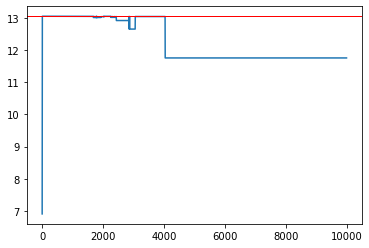

In [108]:
plt.plot(t)
plt.axhline(max(y), linewidth=1, color='r')      